# NBA Team Hexbin Shot Charts
### Russell Marvin
Source:
https://towardsdatascience.com/make-a-simple-nba-shot-chart-with-python-e5d70db45d0d

In [89]:
# Import packages
from nba_api.stats.endpoints import shotchartdetail
import json
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Load teams file
teams = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/teams.json').text)
# Load players file
players = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/players.json').text)


# Get team ID based on team name
def get_team_id(queried_team):
  for team in teams:
    if team['teamName'] == queried_team:
      return team['teamId']
  return -1

# Get player ID based on player name
def get_player_id(first, last):
  for player in players:
    if player['firstName'] == first and player['lastName'] == last:
      return player['playerId']
  return -1

# Create JSON request
shot_json = shotchartdetail.ShotChartDetail(
            team_id = get_team_id('Milwaukee Bucks'),
            player_id = get_player_id('Giannis', 'Antetokounmpo'),
            context_measure_simple = 'PTS',
            season_nullable = '2017-18',
            season_type_all_star = 'Regular Season')


# Load data into a Python dictionary
shot_data = json.loads(shot_json.get_json())

# Get the relevant data from our dictionary
relevant_data = shot_data['resultSets'][0]

# Get the headers and row data
headers = relevant_data['headers']
rows = relevant_data['rowSet']

# Create pandas DataFrame
giannis_data = pd.DataFrame(rows)
giannis_data.columns = headers

#display list of columns available:
giannis_data.columns


Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM'],
      dtype='object')

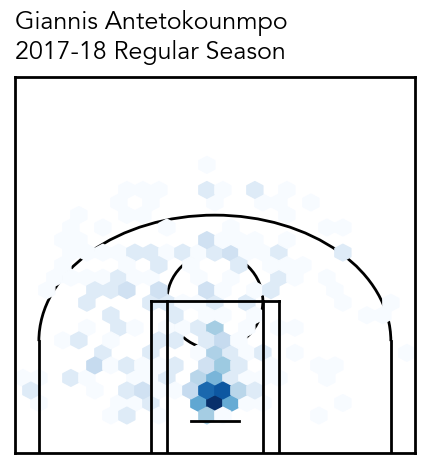

In [88]:
# Function to draw basketball court
def create_court(ax, color):
    
    # Short corner 3PT lines
    ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
    ax.plot([220, 220], [0, 140], linewidth=2, color=color)
    
    # 3PT Arc
    ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2))
    
    # Lane and Key
    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))
    
    # Rim
    ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))
    
    # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
    
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)
    
    return ax

# Create figure and axes
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])

# Draw court
ax = create_court(ax, 'black')

# Plot hexbin of shots
ax.hexbin(giannis_data['LOC_X'], giannis_data['LOC_Y'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), bins='log', cmap='Blues')

# Annotate player name and season
ax.text(0, 1.05, 'Giannis Antetokounmpo\n2017-18 Regular Season', transform=ax.transAxes, ha='left', va='baseline')

# Save and show figure
plt.savefig('giannisShotChart.png', dpi=300, bbox_inches='tight')
plt.show()